# Baby Names Analysis

This notebook explores the baby names dataset provided by the U.S. Social Security Administration (SSA). It visualizes the number of male and female babies born each year and identifies the most popular baby names based on birth counts.

## Data Preprocessing

We start by loading and cleaning the data before performing the analysis.


In [1]:
# Import necessary libraries
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO

# Define function to extract data
def extract_data(zip_file_path, extract_to_folder):
    """Extract data from a zip file and save CSVs into a folder."""
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_folder)

# Extract the data
zip_file_path = r'C:\Users\Avinash rai\Downloads\names.zip'  
extract_to_folder = r'C:\Users\Avinash rai\Downloads\data/'  

if not os.path.exists(extract_to_folder):
    os.makedirs(extract_to_folder)
extract_data(zip_file_path, extract_to_folder)


In [5]:
extract_to_folder = r'C:\Users\Avinash rai\Downloads\data'  # Make sure this path is correct


In [6]:
print(file_names)

['NationalReadMe.pdf', 'yob1880.txt', 'yob1881.txt', 'yob1882.txt', 'yob1883.txt', 'yob1884.txt', 'yob1885.txt', 'yob1886.txt', 'yob1887.txt', 'yob1888.txt', 'yob1889.txt', 'yob1890.txt', 'yob1891.txt', 'yob1892.txt', 'yob1893.txt', 'yob1894.txt', 'yob1895.txt', 'yob1896.txt', 'yob1897.txt', 'yob1898.txt', 'yob1899.txt', 'yob1900.txt', 'yob1901.txt', 'yob1902.txt', 'yob1903.txt', 'yob1904.txt', 'yob1905.txt', 'yob1906.txt', 'yob1907.txt', 'yob1908.txt', 'yob1909.txt', 'yob1910.txt', 'yob1911.txt', 'yob1912.txt', 'yob1913.txt', 'yob1914.txt', 'yob1915.txt', 'yob1916.txt', 'yob1917.txt', 'yob1918.txt', 'yob1919.txt', 'yob1920.txt', 'yob1921.txt', 'yob1922.txt', 'yob1923.txt', 'yob1924.txt', 'yob1925.txt', 'yob1926.txt', 'yob1927.txt', 'yob1928.txt', 'yob1929.txt', 'yob1930.txt', 'yob1931.txt', 'yob1932.txt', 'yob1933.txt', 'yob1934.txt', 'yob1935.txt', 'yob1936.txt', 'yob1937.txt', 'yob1938.txt', 'yob1939.txt', 'yob1940.txt', 'yob1941.txt', 'yob1942.txt', 'yob1943.txt', 'yob1944.txt', 'y

## Data Loading and Preprocessing

We load the data, clean it, and prepare it for analysis.


In [11]:
import os
import pandas as pd

# Define the folder where the TXT files are located
data_folder = r'C:\Users\Avinash rai\Downloads\data'  # Update this path as necessary

# Initialize an empty list to hold the data from all TXT files
all_data = []

# List the files in the folder to check for the existence of year-based files
file_names = os.listdir(data_folder)
print(f"Files in the directory: {file_names}")  # Debugging line to check files

# Iterate over the files in the folder and process the year-based TXT files
for file_name in file_names:
    if file_name.endswith('.txt'):  # Process only TXT files
        year = file_name[3:7]  # Extract the year from the file name (e.g., 'yob2000.txt' -> '2000')
        file_path = os.path.join(data_folder, file_name)
        print(f"Reading file: {file_path}")  # Debugging line
        
        # Read the file into a DataFrame, assuming it's comma-separated
        try:
            df = pd.read_csv(file_path, header=None, names=['Name', 'Sex', 'Count'], encoding='utf-8')
            # Add a 'Year' column to each record
            df['Year'] = year
            all_data.append(df)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

# Check if any files were successfully read
if not all_data:
    print("No TXT files were found or read.")
else:
    # Concatenate all data into a single DataFrame
    data = pd.concat(all_data, ignore_index=True)

    # Display the shape and first few rows of the data
    print(f"Data shape: {data.shape}")  # This will show how many rows and columns are there
    print(f"First few rows:\n{data.head()}")

    # Drop any rows with missing values (if any)
    data.dropna(inplace=True)

    # Display the cleaned data
    print(f"Cleaned data preview:\n{data.head()}")


Files in the directory: ['NationalReadMe.pdf', 'yob1880.txt', 'yob1881.txt', 'yob1882.txt', 'yob1883.txt', 'yob1884.txt', 'yob1885.txt', 'yob1886.txt', 'yob1887.txt', 'yob1888.txt', 'yob1889.txt', 'yob1890.txt', 'yob1891.txt', 'yob1892.txt', 'yob1893.txt', 'yob1894.txt', 'yob1895.txt', 'yob1896.txt', 'yob1897.txt', 'yob1898.txt', 'yob1899.txt', 'yob1900.txt', 'yob1901.txt', 'yob1902.txt', 'yob1903.txt', 'yob1904.txt', 'yob1905.txt', 'yob1906.txt', 'yob1907.txt', 'yob1908.txt', 'yob1909.txt', 'yob1910.txt', 'yob1911.txt', 'yob1912.txt', 'yob1913.txt', 'yob1914.txt', 'yob1915.txt', 'yob1916.txt', 'yob1917.txt', 'yob1918.txt', 'yob1919.txt', 'yob1920.txt', 'yob1921.txt', 'yob1922.txt', 'yob1923.txt', 'yob1924.txt', 'yob1925.txt', 'yob1926.txt', 'yob1927.txt', 'yob1928.txt', 'yob1929.txt', 'yob1930.txt', 'yob1931.txt', 'yob1932.txt', 'yob1933.txt', 'yob1934.txt', 'yob1935.txt', 'yob1936.txt', 'yob1937.txt', 'yob1938.txt', 'yob1939.txt', 'yob1940.txt', 'yob1941.txt', 'yob1942.txt', 'yob1943

## Gender Distribution Analysis

Next, we visualize the gender distribution of babies born each year.


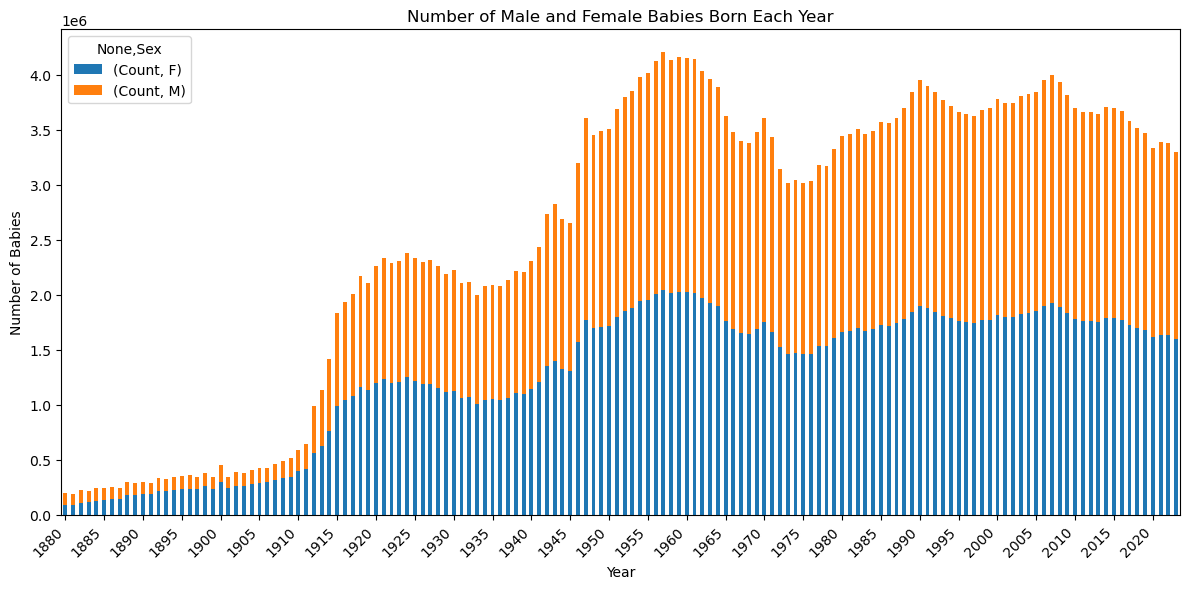

In [16]:
# Group by year and gender, then plot the distribution
gender_data = data.groupby(['Year', 'Sex']).agg({'Count': 'sum'}).unstack().fillna(0)

# Plot as a stacked bar chart
ax = gender_data.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set the title and labels
plt.title('Number of Male and Female Babies Born Each Year')
plt.ylabel('Number of Babies')
plt.xlabel('Year')

# Reduce the number of x-ticks to make it less cluttered
ax.set_xticks(range(0, len(gender_data), 5))  # Show every 5th year
ax.set_xticklabels(gender_data.index[::5], rotation=45, ha="right")  # Rotate and adjust alignment

# Adjust layout for tight spacing
plt.tight_layout()

# Show the plot
plt.show()


## Top 100 Baby Names Analysis

Now, we analyze the most popular baby names based on birth counts.


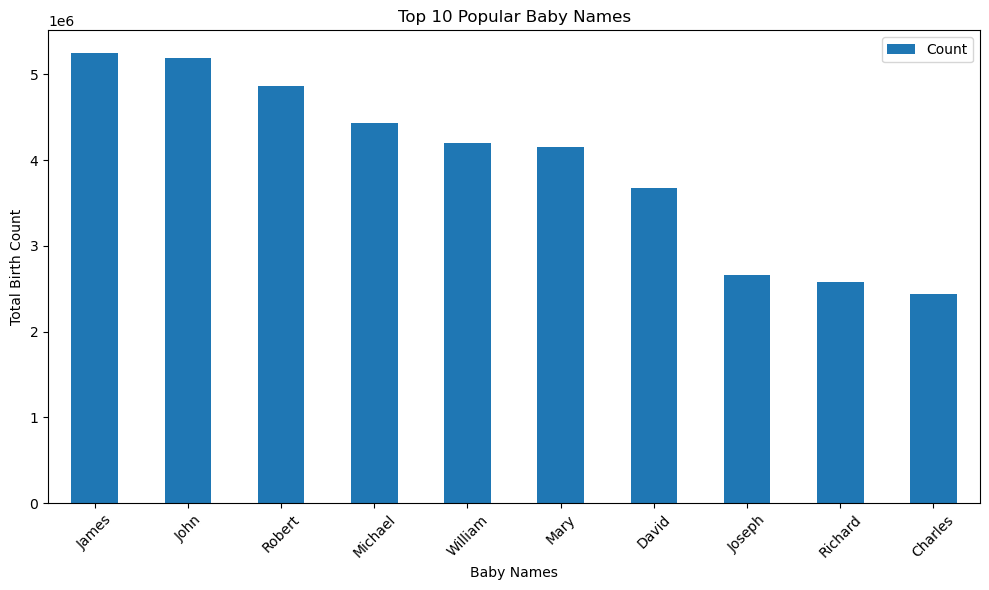

In [15]:
# Get top 100 names based on birth count
popular_names = data.groupby('Name').agg({'Count': 'sum'}).sort_values(by='Count', ascending=False)
top_100_names = popular_names.head(100)

# Plot the top 10 names
top_10_names = popular_names.head(10)
top_10_names.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Popular Baby Names')
plt.ylabel('Total Birth Count')
plt.xlabel('Baby Names')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
